<a href="https://colab.research.google.com/github/radicaleid/photo_processing_sisi/blob/main/photo_processing_sisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 输入下列选项; 2. Run all cells (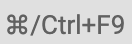)

In [33]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2gray
from skimage.exposure import histogram

class photo_processing():
  def __init__(self,file,cmap='rainbow'):
      self.image=io.imread(file)
      self.image=self.image/np.max(self.image)
      self.image_grey=rgb2gray(img_as_ubyte(self.image))
      self.cmap=cmap
      self.figsize=(16,12)
      print('高: {} 像素， 宽： {} 像素'.format(self.image.shape[0],self.image.shape[1]))
      self.img_entropy=np.array([])
      self.img_overlay=np.array([])

  def draw_image(self,image,title='',cmap='rainbow',draw_cbar=False):
      fig, ax = plt.subplots(ncols=1, figsize=self.figsize)
      img = ax.imshow(image, cmap=cmap)
      ax.set_title(title)
      ax.axis("off")
      if draw_cbar:
        cax=fig.colorbar(img, ax=ax)
      plt.show()

  def draw_histogram(self,image):
      fig = plt.figure(figsize=(self.figsize[0]*2,self.figsize[1]))
      ax1 = fig.add_subplot(121)
      ax1.imshow(image,cmap=pp.cmap)
      ax1.axis('off')

      hist, hist_centers = histogram(image)
      ax2 = fig.add_subplot(122)
      ax2.plot(hist_centers, hist, lw=2)
      ax2.set_title('Gray-scale histogram')
      ax2.set_yscale('symlog')
      plt.show()

  def getEntropy(self,size=10,draw_cbar=False):
      self.img_entropy=entropy(self.image_grey, disk(size))
      self.img_entropy=self.img_entropy/np.max(self.img_entropy)
      self.draw_image(self.img_entropy,"Entropy",self.cmap,draw_cbar=draw_cbar)

  def getOverlay(self,draw_cbar=False):
      self.img_overlay=(self.image_grey+self.img_entropy)/2.
      self.draw_image(self.img_overlay,"Overlay",self.cmap,draw_cbar=draw_cbar)


In [34]:
#@title 1. 图片地址或链接(default:https://www.pngarts.com/files/3/Fox-PNG-Photo.png)<br>2. color map name (rainbow, coolwarm, 更多https://matplotlib.org/stable/tutorials/colors/colormaps.html)
file="" #@param {type:"string"}
cmap="rainbow" #@param {type:"string"}
if file=='':
  file="https://www.pngarts.com/files/3/Fox-PNG-Photo.png"
if cmap=='':
  cmap='rainbow'
pp=photo_processing(file,cmap)
显示原图 = False #@param {type:"boolean"}
if 显示原图:
  pp.draw_image(pp.image,"Image")
显示灰度图 = False #@param {type:"boolean"}
if 显示灰度图:
  pp.draw_image(pp.image_grey,"Image in greyscale",plt.cm.gray)
plt.tight_layout()

高: 1024 像素， 宽： 773 像素


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


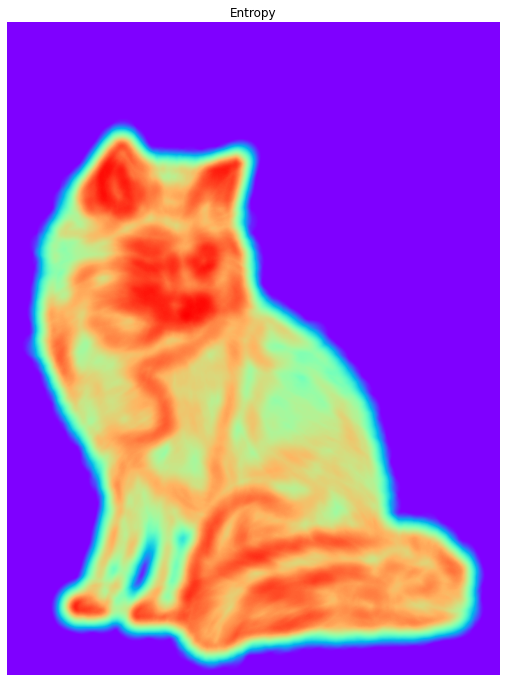

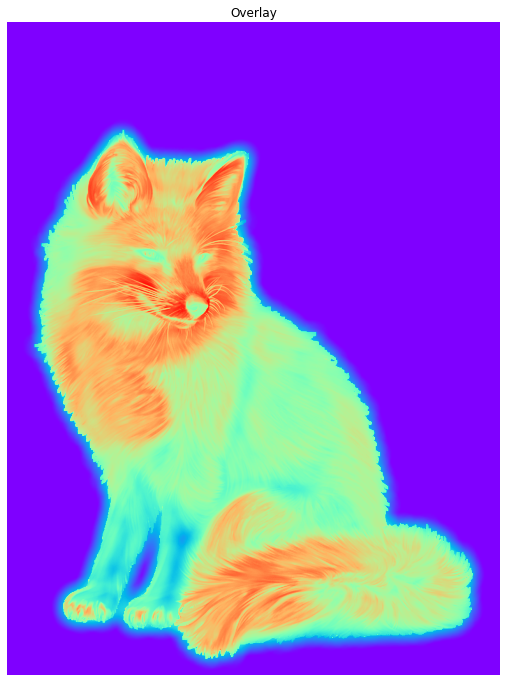

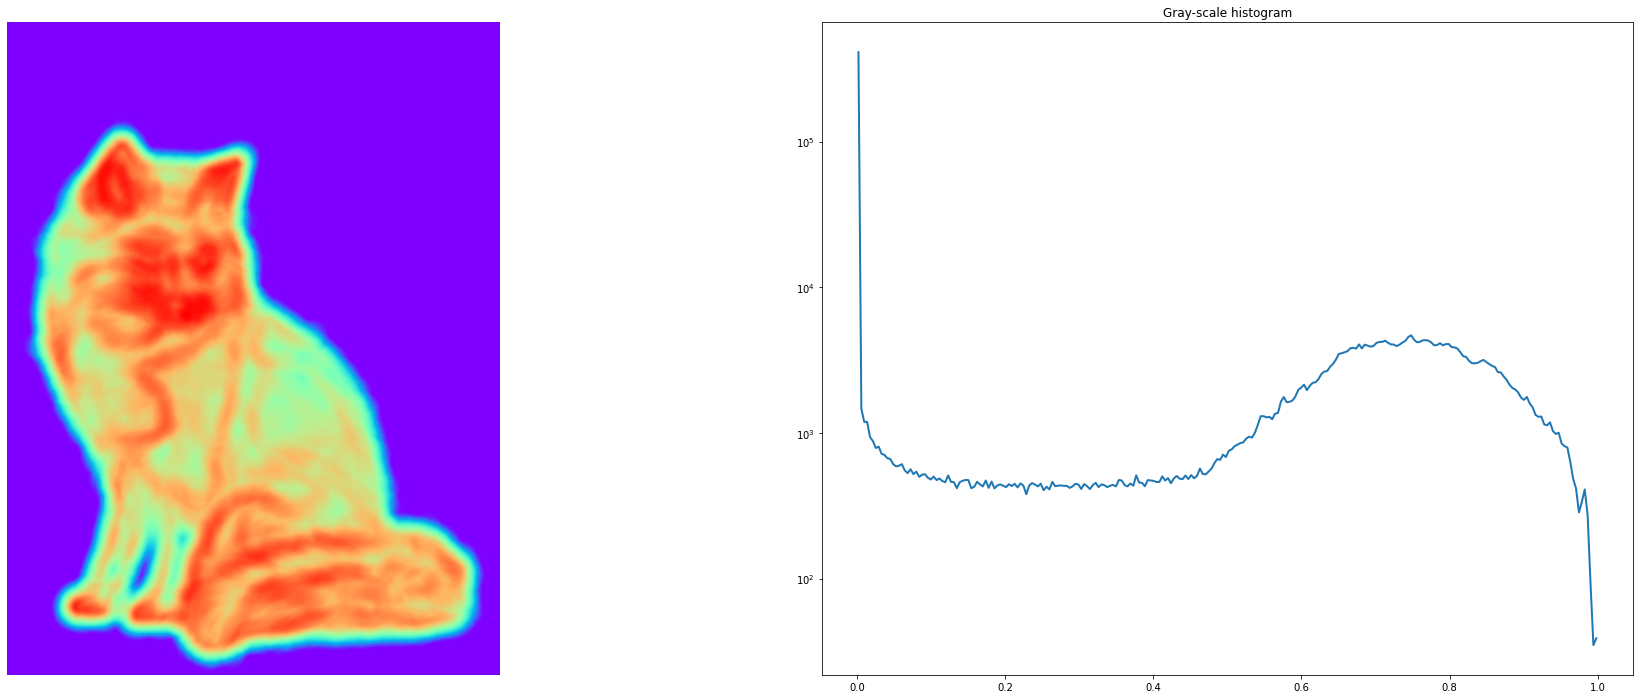

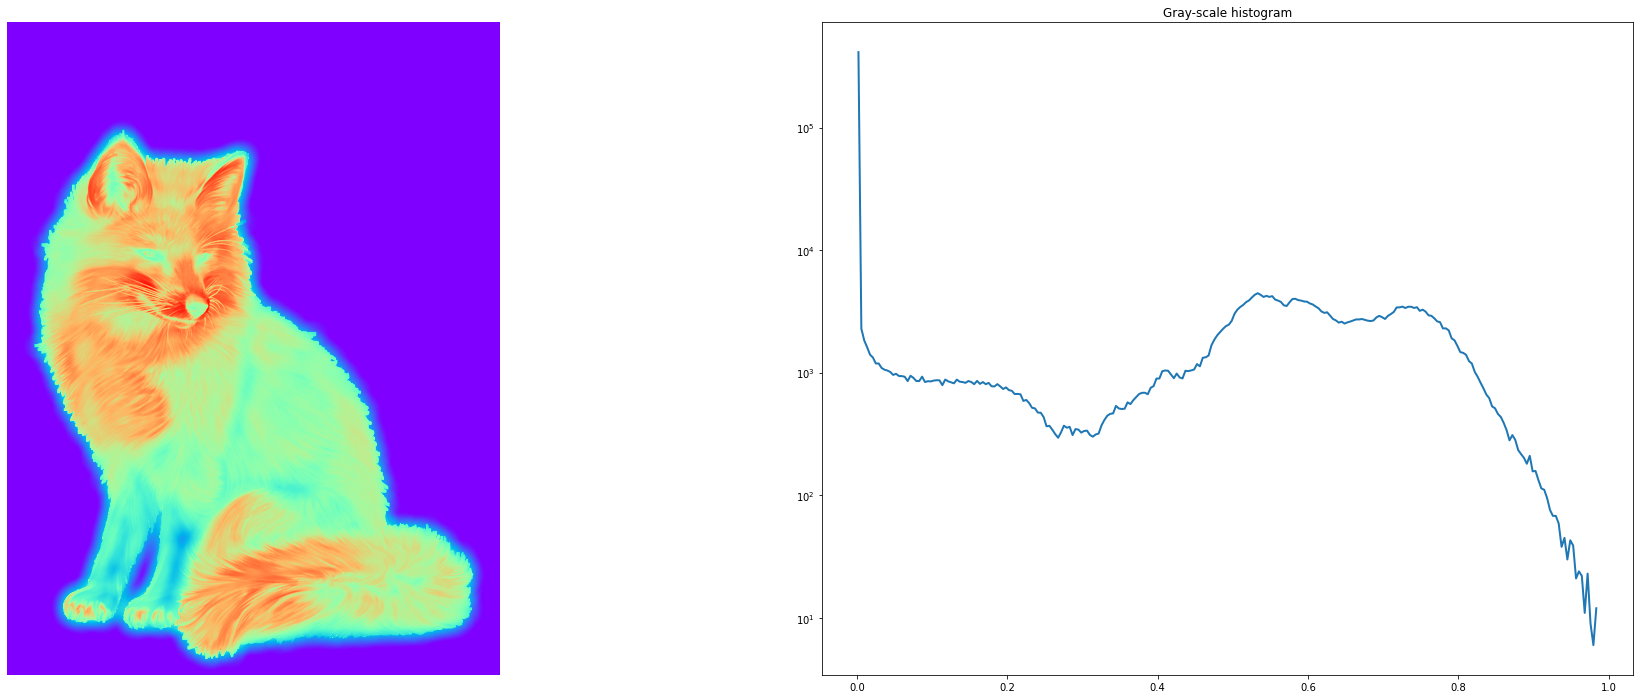

In [35]:
#@title Entropy: 
区域范围 =  20#@param {type:"integer"}
if 区域范围 == 0:
  size=10
if 区域范围 > np.min((pp.image.shape[0],pp.image.shape[1])):
  size=np.min((pp.image.shape[0],pp.image.shape[1]))
else:
  size=区域范围
draw_cbar = False #@param {type:"boolean"}
pp.getEntropy(size=size,draw_cbar=draw_cbar)
显示Overlay = True #@param {type:"boolean"}
if 显示Overlay:
  pp.getOverlay(draw_cbar=draw_cbar)
显示histogram = True #@param {type:"boolean"}
if 显示histogram:
  pp.draw_histogram(pp.img_entropy)
  pp.draw_histogram(pp.img_overlay)
